In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

1. Imported dataframe

In [2]:
# read csv file
df_sk = pd.read_csv("project1_data.csv")
df_sk.head()

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no


2. Identified null values

In [3]:
df_sk.isnull().sum()

age            0
job          311
marital        0
education      0
balance        0
housing        0
loan           0
y             14
dtype: int64

In [4]:
#describe the data
df_sk.describe(include = 'all')

,age,job,marital,education,balance,housing,loan,y
count,45211.00000,44900,45211,45211,45211.000000,45211,45211,45197
unique,NaN,12,3,4,NaN,2,2,2
top,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,9674,27214,23202,NaN,25130,37967,39909
mean,40.86417,NaN,NaN,NaN,1310.900290,NaN,NaN,NaN
std,10.75041,NaN,NaN,NaN,3806.997684,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,-99999.000000,NaN,NaN,NaN
25%,33.00000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,39.00000,NaN,NaN,NaN,448.000000,NaN,NaN,NaN
75%,48.00000,NaN,NaN,NaN,1426.500000,NaN,NaN,NaN


In [5]:
df_sk['job'].value_counts()

blue-collar      9674
management       9380
technician       7551
admin.           5135
services         4125
retired          2245
self-employed    1566
entrepreneur     1480
unemployed       1293
housemaid        1235
student           933
unknown           283
Name: job, dtype: int64

In [6]:
df_sk['y'].value_counts()

no     39909
yes     5288
Name: y, dtype: int64

3. erroneous data

In [7]:
# filled null values of categorical variable job with mode
df_sk['job'] = df_sk['job'].fillna("blue-collar")

In [9]:
# dropped null values of target variable 
df_sk = df_sk.dropna()
df_sk

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,no
1,44,technician,single,secondary,29,yes,no,no
2,33,entrepreneur,married,secondary,2,yes,yes,no
3,47,blue-collar,married,unknown,1506,yes,no,no
4,33,unknown,single,unknown,1,no,no,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,yes
45207,71,retired,divorced,primary,1729,no,no,yes
45208,72,retired,married,secondary,5715,no,no,yes
45209,57,blue-collar,married,secondary,668,no,no,no


In [10]:
df_sk['age'].value_counts()

32    2083
31    1994
33    1970
34    1924
35    1885
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 78, dtype: int64

In [11]:
df_sk.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [12]:
# for age min age - 0 seems odd, so we can remove that value
df_sk = df_sk[df_sk.age != 0]
df_sk.describe(include = "all")

,age,job,marital,education,balance,housing,loan,y
count,45116.000000,45116,45116,45116,45116.000000,45116,45116,45116
unique,NaN,12,3,4,NaN,2,2,2
top,NaN,blue-collar,married,secondary,NaN,yes,no,no
freq,NaN,9965,27157,23154,NaN,25076,37886,39839
mean,40.938137,NaN,NaN,NaN,1310.821039,NaN,NaN,NaN
std,10.620132,NaN,NaN,NaN,3806.377071,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,-99999.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,448.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,1428.250000,NaN,NaN,NaN


7. Encoded the target variable

In [16]:
# y - 0 as no, 1 as yes
df_sk['y'] = df_sk['y'].map({'yes': 1, 'no': 0})
y= df_sk['y']
y

C:\Users\kotas\AppData\Local\Temp\ipykernel_17776\3887097593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sk['y'] = df_sk['y'].map({'yes': 1, 'no': 0})


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45116, dtype: int64

In [17]:
df_sk.skew(axis=0, skipna=True)

C:\Users\kotas\AppData\Local\Temp\ipykernel_17776\1314076470.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sk.skew(axis=0, skipna=True)


age        0.685267
balance   -5.312699
y          2.383777
dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

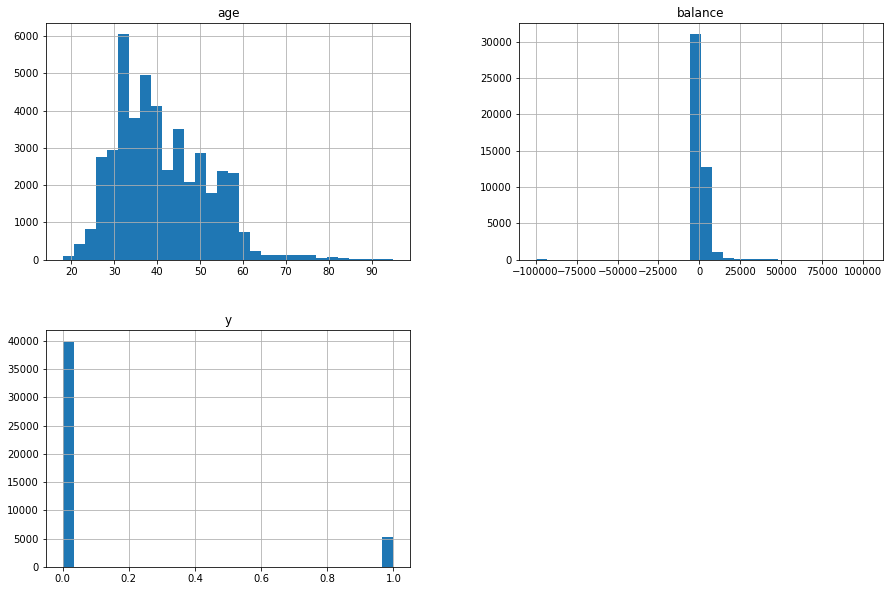

In [18]:
df_sk.hist(bins = 30, figsize=(15,10))

In [19]:
df_sk.corr()

,age,balance,y
age,1.000000,0.080826,0.025662
balance,0.080826,1.000000,0.047117
y,0.025662,0.047117,1.000000


5. EDA analysis

1. Minimum balance is shown negative, which might be possible to have in the account in the form of debt or loss in shares.
2. After removing minimum age 0 rows, the min age becomes 18, which satisfies the legal condition of having minimum age 18 years for securing a loan.
3. Balance variable shows the negative skewness, which indicates that the distribution is left skewed.
4. From the skewness value and the distribution, variable age is moderately skewed.

In [20]:
categorical = ['job','marital','education','housing','loan']

6. Encoded the categorical variables

In [21]:
dummy_data = pd.get_dummies(df_sk[['job','marital','education','housing','loan']],drop_first=True)

In [22]:
dummy_data.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [23]:
df_sk.head()

,age,job,marital,education,balance,housing,loan,y
0,58,management,married,tertiary,2143,yes,no,0
1,44,technician,single,secondary,29,yes,no,0
2,33,entrepreneur,married,secondary,2,yes,yes,0
3,47,blue-collar,married,unknown,1506,yes,no,0
4,33,unknown,single,unknown,1,no,no,0


In [24]:
num_data = ['age','balance']
X=pd.concat([df_sk[num_data], dummy_data], axis=1)
X.describe(include='all')

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes
count,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000,45116.000000
mean,40.938137,1310.821039,0.220875,0.032716,0.027285,0.207576,0.049672,0.034622,0.091209,0.020614,0.167080,0.028615,0.006251,0.601937,0.282826,0.513210,0.294197,0.041094,0.555812,0.160254
std,10.620132,3806.377071,0.414841,0.177893,0.162915,0.405576,0.217269,0.182822,0.287910,0.142088,0.373052,0.166724,0.078814,0.489504,0.450378,0.499831,0.455686,0.198510,0.496881,0.366845
min,18.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1428.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Splitted the dataset into train and test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train.head()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes
24979,46,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
38042,41,174,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3321,58,2577,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1
35532,33,5214,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
22920,42,295,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [27]:
y_train.head()

24979    1
38042    0
3321     0
35532    0
22920    0
Name: y, dtype: int64

8. Prevalence of the target variable

In [28]:
# prevalence (class balance of the target variable)
y_prevalence = df_sk['y'].value_counts()

In [29]:
prevalence = y_prevalence[1]/(y_prevalence[1]+y_prevalence[0])
prevalence

0.11696515648550404

<AxesSubplot:xlabel='y', ylabel='count'>

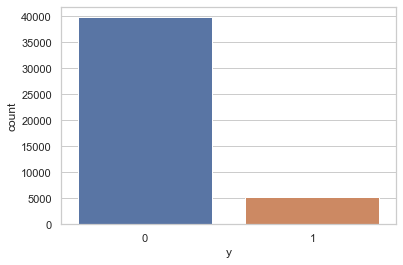

In [30]:
#prevalence of the target
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(data=df_sk, x="y")

In [31]:
from sklearn.linear_model import LogisticRegression

9. Logistic regression model

In [32]:
log_reg = LogisticRegression(random_state=4)

In [33]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=4)

10. model to generate probability predictions

In [34]:
pred_prob = log_reg.predict_proba(X_test)
pred_prob

array([[0.87252881, 0.12747119],
       [0.83939722, 0.16060278],
       [0.87194574, 0.12805426],
       ...,
       [0.887124  , 0.112876  ],
       [0.84701476, 0.15298524],
       [0.9344068 , 0.0655932 ]])

11. Area under ROC Curve

In [35]:
# ROC AUC of the dataset
roc_auc_score(y_test, pred_prob[:,1])

0.6425025300261595

12. Appropriate decision prediction

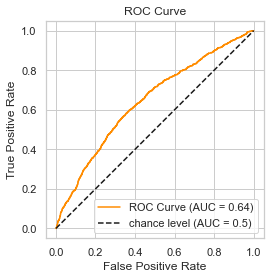

In [36]:
RocCurveDisplay.from_predictions(
    y_test,
    pred_prob[:, 1],
    name='ROC Curve',
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

13. Confusion matrix

In [37]:
confusion_matrix(y_test, pd.Series([1 if x > 0.5 else 0 for x in pred_prob[:,1]]))

array([[7934,    1],
       [1089,    0]], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

prediction_prob=log_reg.predict(X_test)

prediction =list(map(round, prediction_prob))
confusion_matrix(y_test, prediction)

array([[7934,    1],
       [1089,    0]], dtype=int64)

In [42]:
# summary of logistic regression model
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.342864
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36092
Model:                          Logit   Df Residuals:                    36072
Method:                           MLE   Df Model:                           19
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                 0.04482
Time:                        22:24:01   Log-Likelihood:                -12375.
converged:                       True   LL-Null:                       -12955.
Covariance Type:            nonrobust   LLR p-value:                1.678e-234
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0190      0.001    -14.203      0.000      -0.022      -0.016
ba

14. Summary of the dataset

Overall model is poor as the ROC AUC is relatively less to become a good model.

From the confusion matrix we can say that the good prediction of true negatives which indicates the client as No, where as prediction of true positives of client as yes is very bad. 

In the business stakeholder point, the overall model is poor for predicting the use of target variable(whether the client subscribed a term deposit or not). 